## 回帰診断について

回帰診断とは、回帰モデルの適合性や信頼性を評価するために、モデルの残差やその他の指標を分析する手法の総称です。回帰診断を行うことで、モデルの仮定が満たされているかどうか、異常値や影響力の強い観測値が存在するかどうか、モデルの予測性能が適切であるかどうかを確認することができます。

### 主な回帰診断の方法

1. **残差プロット**:
    残差プロットは、予測値と残差の関係を視覚化したものです。残差プロットを観察することで、モデルの線形性、等分散性、独立性の仮定が満たされているかを確認できます。理想的には、残差はランダムに散らばっており、特定のパターンを持たないはずです。

2. **正規Q-Qプロット**:
    残差が正規分布に従うかを確認するために使用します。正規Q-Qプロットで残差が45度の直線に近い場合、残差は正規分布に従っていると判断できます。

3. **標準化残差と外れ値の検出**:
    標準化残差（または学生化残差）は、残差のスケールを調整したもので、異常値や外れ値の検出に使用されます。標準化残差の絶対値が大きい場合、その観測値は外れ値とみなされる可能性があります。

4. **影響力の強い観測値の検出**:
    クックの距離やレバレッジ値を用いて、影響力の強い観測値（データポイント）を特定します。これらの指標は、特定の観測値が回帰モデルにどれほどの影響を与えるかを示します。

5. **分散拡大要因（VIF）**:
    多重共線性の存在を評価するために使用されます。VIFが高い場合、説明変数間に強い相関があり、回帰係数の推定が不安定になる可能性があります。

### Pythonコード例

以下に、回帰診断の一部を行うPythonコードの例を示します。



このコードは、以下の回帰診断を実行します。

1. 残差プロット
2. 正規Q-Qプロット
3. 標準化残差のヒストグラム
4. クックの距離プロット

これにより、モデルの仮定や外れ値、影響力の強い観測値を視覚的に確認できます。

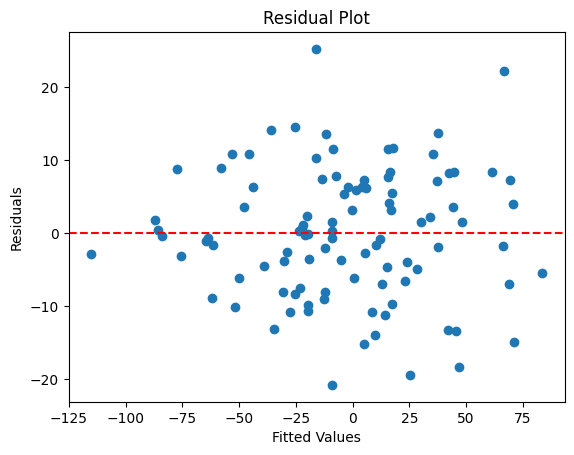

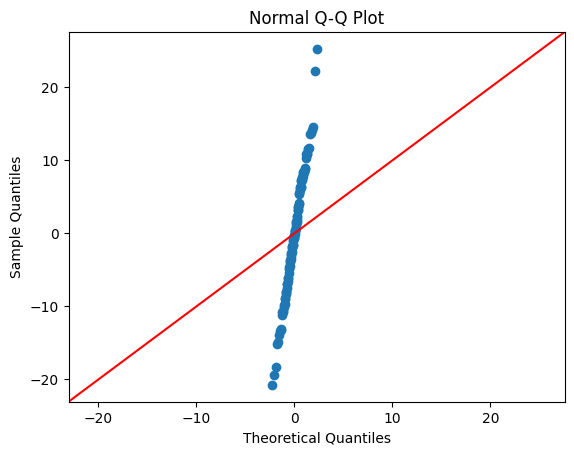

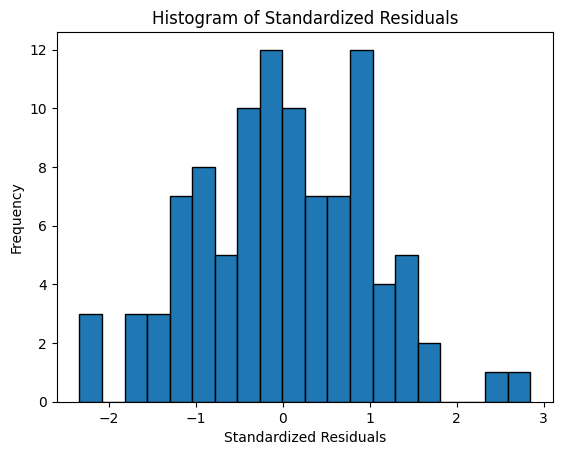

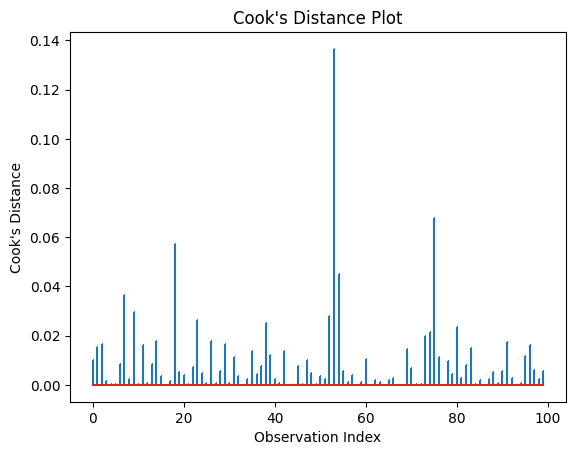

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# データセットの作成
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X = sm.add_constant(X)  # 切片項を追加

# 回帰モデルのフィッティング
model = sm.OLS(y, X).fit()

# 残差の計算
residuals = model.resid

# 残差プロット
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# 正規Q-Qプロット
sm.qqplot(residuals, line='45')
plt.title('Normal Q-Q Plot')
plt.show()

# 標準化残差の計算
standardized_residuals = model.get_influence().resid_studentized_internal

# 標準化残差のヒストグラム
plt.hist(standardized_residuals, bins=20, edgecolor='k')
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals')
plt.show()

# クックの距離
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# クックの距離のプロット
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()


## レバレッジ（Leverage）について

レバレッジ（Leverage）とは、回帰分析において各観測値の影響力を評価する指標の一つです。具体的には、ある観測値が回帰モデルのフィッティングにどれほど影響を与えるかを示します。レバレッジが高い観測値は、回帰直線や平面に大きな影響を与えるため、これらのデータポイントに特に注意を払う必要があります。

### レバレッジの計算

レバレッジは、ハットマトリックス（$H$）の対角要素として計算されます。ハットマトリックスは以下のように定義されます。

$$
H = X(X^TX)^{-1}X^T
$$

ここで、$X$ はデザイン行列（独立変数の行列）です。レバレッジ値はハットマトリックスの対角成分 $h_{ii}$ として与えられます。

### レバレッジの解釈

- レバレッジ値 $h_{ii}$ は常に 0 から 1 の間にあります。
- レバレッジ値の平均は $\frac{p+1}{n}$ であり、ここで $p$ は独立変数の数、$n$ は観測数です。
- レバレッジ値がこの平均値よりも大きい場合、その観測値は高いレバレッジを持つと考えられます。

### レバレッジの用途

1. **外れ値の検出**:
    レバレッジ値が高い観測値は、モデルに強い影響を与える可能性があるため、外れ値や異常値として検討されることがあります。

2. **影響力の評価**:
    レバレッジ値は、観測値が回帰モデルにどれだけ影響を与えるかを示すため、モデルの安定性や信頼性の評価に使用されます。

### Pythonコード例

以下に、レバレッジ値を計算し、プロットするPythonコードの例を示します。



このコードでは、以下のステップでレバレッジ値を計算し、プロットしています。

1. データセットを作成し、回帰モデルをフィッティングします。
2. ハットマトリックスの対角成分（レバレッジ値）を計算します。
3. レバレッジ値をプロットし、高いレバレッジ値を持つ観測値を視覚的に確認します。

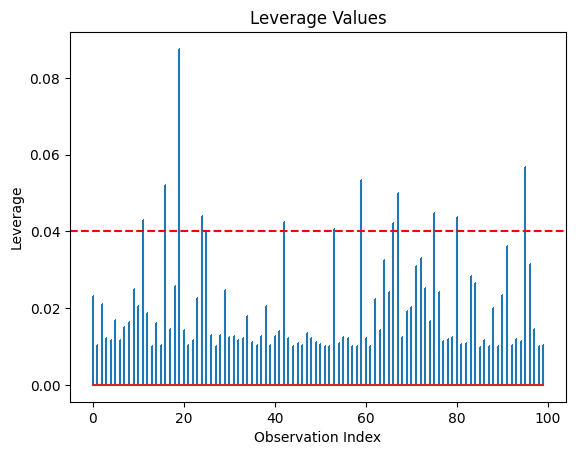

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.datasets import make_regression

# データセットの作成
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X = sm.add_constant(X)  # 切片項を追加

# 回帰モデルのフィッティング
model = sm.OLS(y, X).fit()

# レバレッジ値の計算
influence = model.get_influence()
leverage = influence.hat_matrix_diag

# レバレッジ値のプロット
plt.stem(np.arange(len(leverage)), leverage, markerfmt=",")
plt.axhline(y=2*(X.shape[1])/len(X), color='r', linestyle='--')  # 一般的な閾値
plt.xlabel('Observation Index')
plt.ylabel('Leverage')
plt.title('Leverage Values')
plt.show()